In [2]:
import numpy as np
import csv

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt


首先輸入資料(資料來源:大氣水文資料庫，https://drive.google.com/open?id=1shsXY7r0TvH4vDfPCeRhIwY5nTJ7wiOY)

In [4]:
data = [line.strip('\n').split(',') for line in open('ml.csv','r') ]

In [5]:
for i in range(30):
    print(data[i])

['Stno', 'Datatime', 'PP01', 'PS01', 'RH01', 'TX01', 'WD01', 'WD02']
['466920', '1897/1/2 AM 12:00:00', '0', '1021.2', '82', '18.6', '1.2', '-9999']
['466920', '1897/1/3 AM 12:00:00', '0', '1020.6', '86', '18.3', '1.4', '-9999']
['466920', '1897/1/4 AM 12:00:00', '0', '1019.4', '86', '19.1', '0.7', '-9999']
['466920', '1897/1/5 AM 12:00:00', '0', '1017.4', '82', '19.5', '0.9', '-9999']
['466920', '1897/1/6 AM 12:00:00', '-9998', '1015', '84', '20.9', '0.9', '-9999']
['466920', '1897/1/7 AM 12:00:00', '0.2', '1015.8', '90', '18.9', '2.6', '-9999']
['466920', '1897/1/8 AM 12:00:00', '0', '1015.3', '84', '19.2', '3', '-9999']
['466920', '1897/1/9 AM 12:00:00', '-9998', '1018.8', '84', '17.4', '3.6', '-9999']
['466920', '1897/1/10 AM 12:00:00', '0.1', '1019.3', '83', '17.5', '5.1', '-9999']
['466920', '1897/1/11 AM 12:00:00', '-9998', '1014.5', '86', '19.3', '2.8', '-9999']
['466920', '1897/1/12 AM 12:00:00', '4.1', '1013.8', '84', '19.4', '3.8', '-9999']
['466920', '1897/1/13 AM 12:00:00'

其中，每一列的第6欄為我們要的溫度(TX01)

In [6]:
d_arr =np.array(data) #將資料轉換成矩陣

In [7]:
d_arr

array([['Stno', 'Datatime', 'PP01', ..., 'TX01', 'WD01', 'WD02'],
       ['466920', '1897/1/2 AM 12:00:00', '0', ..., '18.6', '1.2',
        '-9999'],
       ['466920', '1897/1/3 AM 12:00:00', '0', ..., '18.3', '1.4',
        '-9999'],
       ...,
       ['466920', '2018/3/30 AM 12:00:00', '-9998', ..., '23.7', '4',
        '50'],
       ['466920', '2018/3/31 AM 12:00:00', '0', ..., '24.1', '3.7', '60'],
       ['466920', '2018/4/1 AM 12:00:00', '0', ..., '24.9', '2.8', '50']],
      dtype='<U22')

看看我們要的氣溫資料是否為正確型態

In [8]:
d_arr[1][5]

'18.6'

接著取出t-364、t-5到t-1天的溫度作為輸入資料(x)，第t日的資料為輸出(y)
*資料要扣除標題、第一年的元素、第二年前五個元素(因為會造成輸入值不足五個)、以及最後一個元素(因為沒有輸出))

In [9]:
x = []
y = []
for i in range(365,len(d_arr)-372): #扣掉標題，以及前面五個數據，還有最後一個數據
    element = [float(d_arr[i-364][5]),float(d_arr[i+1][5]),float(d_arr[i+2][5]),float(d_arr[i+3][5]),float(d_arr[i+4][5]),float(d_arr[i+5][5])]
    x.append(element)
    y.append([float(d_arr[i+6][5])])

將x、y轉換為矩陣

In [10]:
X = np.array(x)

In [11]:
Y = np.array(y)

In [12]:
len(X)

42545

In [13]:
X

array([[18.6, 18.1, 18.5, 16.6, 19.5, 14.9],
       [18.3, 18.5, 16.6, 19.5, 14.9, 12.4],
       [19.1, 16.6, 19.5, 14.9, 12.4, 13.2],
       ...,
       [25.9, 21.4, 23.9, 23.9, 17.6, 19.4],
       [25.5, 23.9, 23.9, 17.6, 19.4, 21.2],
       [26.6, 23.9, 17.6, 19.4, 21.2, 23.9]])

In [14]:
Y

array([[12.4],
       [13.2],
       [13.8],
       ...,
       [21.2],
       [23.9],
       [25.5]])

接著利用sklearn的工具，以9:1的比例隨機分配出訓練與測試資料

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 9487)

再來將x_train與y_train的資料轉換成可以輸入的形式

In [17]:
 y_train

array([[10.9],
       [23.5],
       [16.3],
       ...,
       [18.6],
       [20. ],
       [28.7]])

In [18]:
x_train

array([[18.6, 16.2, 18. , 17.9, 16.7, 13.3],
       [20. , 19. , 15.2, 16.9, 18.3, 21.4],
       [26.3, 19.6, 18.2, 18.9, 21.7, 20.4],
       ...,
       [13.4, 15.9, 17.9, 18.2, 16.8, 17.2],
       [16.8, 11.6, 13.7, 12.1, 13.9, 17.5],
       [26.5, 26.2, 27.6, 28.9, 29.6, 28.9]])

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# 開始建構模型

建構RNN模型，以兩層LSTM層以及每層16個神經元作為架構

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Embedding , Flatten
from keras.layers import LSTM,Dropout

C:\Users\ASUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
model = Sequential()

model.add(LSTM(16, input_shape=(1, 6), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(16, input_shape=(1, 6), return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(16,kernel_initializer="random_uniform",activation='relu'))
model.add(Dense(1,kernel_initializer="random_uniform",activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 16)             1472      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 16)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


訓練模型

In [23]:
model.fit(x_train,y_train,
         batch_size=64,
         epochs=15)

Epoch 1/15
38290/38290 [==============================] - 3s 70us/step - loss: 149.7980
Epoch 2/15
38290/38290 [==============================] - 1s 34us/step - loss: 17.2315
Epoch 3/15
38290/38290 [==============================] - 1s 34us/step - loss: 14.5254
Epoch 4/15
38290/38290 [==============================] - 1s 33us/step - loss: 12.7174
Epoch 5/15
38290/38290 [==============================] - 1s 34us/step - loss: 11.2636
Epoch 6/15
38290/38290 [==============================] - 1s 35us/step - loss: 9.8273
Epoch 7/15
38290/38290 [==============================] - 1s 35us/step - loss: 8.8227
Epoch 8/15
38290/38290 [==============================] - 1s 33us/step - loss: 7.7257
Epoch 9/15
38290/38290 [==============================] - 1s 33us/step - loss: 6.9174
Epoch 10/15
38290/38290 [==============================] - 1s 33us/step - loss: 6.2675
Epoch 11/15
38290/38290 [==============================] - 1s 35us/step - loss: 5.7002
Epoch 12/15
38290/38290 [=====================

訓練完之後，觀察測試資料的狀況

In [24]:
score = model.evaluate(x_test, y_test)

4255/4255 [==============================] - 0s 60us/step


In [25]:
score

3.1154388861426456

In [26]:
predicted = model.predict(x_test)

In [27]:
predicted

array([[14.174913],
       [28.599903],
       [14.137539],
       ...,
       [16.609818],
       [24.840128],
       [28.336367]], dtype=float32)

嘗試繪製出模式預測的溫度資料以及測試資料的實際溫度來分析

In [28]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

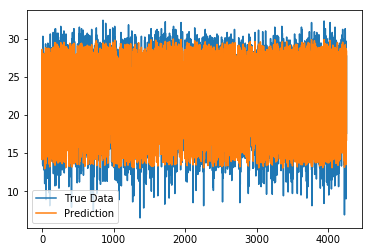

In [29]:
plot_results(predicted,y_test)

資料太多了看不太出來正確性(但是能看出預測資料沒辦法預測極端值的發生)，

我們嘗試擷取前100筆資料

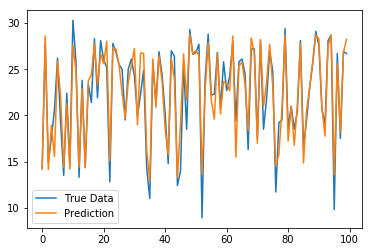

In [30]:
plot_results(predicted[0:100],y_test[0:100])

能夠看出預測資料幾乎都能大致符合實際溫度的走勢

最後嘗試單點的預測分析(用1997/1/27、1998/1/22~1998/1/26的氣溫預測1/28的氣溫)

In [31]:
now = np.array([[[17,16.6,14.9,9.6,10,14.7]]])

In [32]:
now

array([[[17. , 16.6, 14.9,  9.6, 10. , 14.7]]])

In [33]:
predicted28 = model.predict(now)
print(predicted28)

[[15.646848]]


預測溫度為15.6，而當天實際均溫為13.9，且趨勢與實際值相符

建立第二個模型，透過增加神經元看是否可以更準確

In [57]:
model2 = Sequential()

model2.add(LSTM(256, input_shape=(1, 6), return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(128, return_sequences=False))
model2.add(Dropout(0.2))

model2.add(Dense(64,kernel_initializer="random_uniform",activation='relu'))
model2.add(Dense(1,kernel_initializer="random_uniform",activation='linear'))

model2.compile(loss='mse',optimizer='adam')

In [58]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 256)            269312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 474,753
Trainable params: 474,753
Non-trainable params: 0
_________________________________________________________________


In [59]:
model2.fit(x_train,y_train,
         batch_size=64,
         epochs=20)

Epoch 1/20
38290/38290 [==============================] - 11s 282us/step - loss: 45.2405
Epoch 2/20
38290/38290 [==============================] - 9s 245us/step - loss: 5.0968
Epoch 3/20
38290/38290 [==============================] - 10s 262us/step - loss: 4.7536
Epoch 4/20
38290/38290 [==============================] - 9s 236us/step - loss: 4.5729
Epoch 5/20
38290/38290 [==============================] - 9s 236us/step - loss: 4.5334
Epoch 6/20
38290/38290 [==============================] - 9s 242us/step - loss: 4.4609
Epoch 7/20
38290/38290 [==============================] - 9s 246us/step - loss: 4.4712
Epoch 8/20
38290/38290 [==============================] - 9s 247us/step - loss: 4.4104
Epoch 9/20
38290/38290 [==============================] - 10s 249us/step - loss: 4.3425
Epoch 10/20
38290/38290 [==============================] - ETA: 0s - loss: 4.293 - 10s 251us/step - loss: 4.2937
Epoch 11/20
38290/38290 [==============================] - 10s 251us/step - loss: 4.2467
Epoch 12/20

In [60]:
score = model2.evaluate(x_test, y_test)

4255/4255 [==============================] - 1s 134us/step


In [61]:
score

2.9793658745695084

In [62]:
predicted2 = model2.predict(x_test)

In [63]:
def plot_results(predicted2_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted2_data, label='Prediction')
    plt.legend()
    plt.show()

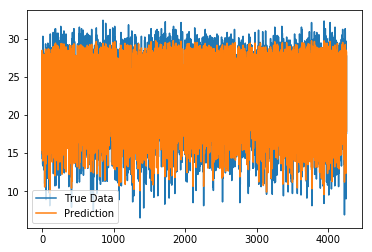

In [64]:
plot_results(predicted2,y_test)

發現其實增加神經元並沒有大幅的改善他在極值時的表現

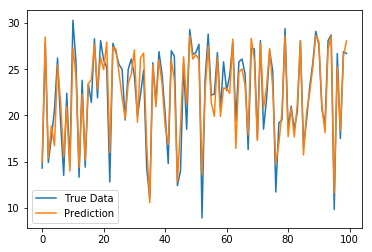

In [65]:
plot_results(predicted2[0:100],y_test[0:100])

In [34]:
x2 = []
y2 = []
for i in range(365,len(d_arr)-372): #扣掉標題，以及前面五個數據，還有最後一個數據
    element = [float(d_arr[i-364][5]),float(d_arr[i+1][5]),float(d_arr[i+2][5]),float(d_arr[i+3][5]),float(d_arr[i+4][5]),float(d_arr[i+5][5]),np.random.normal(0,4)]
    x2.append(element)
    y2.append([float(d_arr[i+6][5])])

In [36]:
X2 = np.array(x2)
Y2 = np.array(y2)
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.1, random_state = 9487)
x2_train = np.reshape(x2_train, (x2_train.shape[0], 1, x2_train.shape[1]))
x2_test = np.reshape(x2_test, (x2_test.shape[0], 1, x2_test.shape[1]))

第三個模型，因為在模擬溫度時發現很難準確的預測到極端事件得發生，因此試試看在資料後面加上隨機的一個亂數，試著打破原本的情況，看可不可以更有效的預測到過熱或過冷的情形

In [37]:
model3 = Sequential()

model3.add(LSTM(16, input_shape=(1, 7), return_sequences=True))
model3.add(Dropout(0.2))

model3.add(LSTM(16, return_sequences=False))
model3.add(Dropout(0.2))

model3.add(Dense(16,kernel_initializer="random_uniform",activation='relu'))
model3.add(Dense(1,kernel_initializer="random_uniform",activation='linear'))

model3.compile(loss='mse',optimizer='adam')

In [38]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 16)             1536      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 16)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [39]:
model3.fit(x2_train,y2_train,
         batch_size=64,
         epochs=20)

Epoch 1/20
38290/38290 [==============================] - 3s 66us/step - loss: 157.9158
Epoch 2/20
38290/38290 [==============================] - 1s 35us/step - loss: 18.5251
Epoch 3/20
38290/38290 [==============================] - 1s 34us/step - loss: 14.6028
Epoch 4/20
38290/38290 [==============================] - 1s 36us/step - loss: 11.8401
Epoch 5/20
38290/38290 [==============================] - 1s 34us/step - loss: 9.9175
Epoch 6/20
38290/38290 [==============================] - 1s 34us/step - loss: 8.4172
Epoch 7/20
38290/38290 [==============================] - 1s 34us/step - loss: 7.1926
Epoch 8/20
38290/38290 [==============================] - 1s 34us/step - loss: 6.3388
Epoch 9/20
38290/38290 [==============================] - 1s 37us/step - loss: 5.7894
Epoch 10/20
38290/38290 [==============================] - 1s 35us/step - loss: 5.4906
Epoch 11/20
38290/38290 [==============================] - 1s 36us/step - loss: 5.2397
Epoch 12/20
38290/38290 [======================

In [40]:
score = model3.evaluate(x2_test, y2_test)

4255/4255 [==============================] - 0s 72us/step


In [41]:
score

3.1444402257087787

In [42]:
predicted3 = model3.predict(x2_test)

In [43]:
def plot_results(predicted3_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted3_data, label='Prediction')
    plt.legend()
    plt.show()

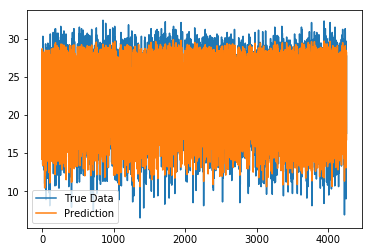

In [44]:
plot_results(predicted3,y2_test)

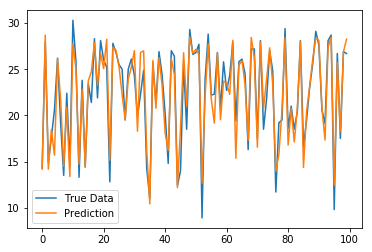

In [45]:
plot_results(predicted3[0:100],y2_test[0:100])

用上述的第一個RNN去產生六月的日均溫（利用五月最後五天的溫度去跑循環）

In [46]:
June1 = np.array([[[27,32,26,24,30,33]]])

In [54]:
for i in range(30):
    data=June1[i:i+6]
    data= np.expand_dims(data, axis=0)
    data= np.expand_dims(data, axis=0)
    predictedM1= model.predict(data)
    June1=np.append(June1,predictedM1)

In [55]:
June1[6:36]

array([28.88461304, 28.88461304, 26.66305923, 27.13178825, 26.41876984,
       27.38224983, 27.13586998, 27.68796539, 27.22115517, 27.59369469,
       27.18360901, 27.57166672, 27.32773209, 27.67875481, 27.48145866,
       27.74616814, 27.57046318, 27.77977753, 27.64878464, 27.82501602,
       27.73236656, 27.87301636, 27.80292892, 27.91063881, 27.85846901,
       27.94198608, 27.90580368, 27.97078514, 27.94623947, 27.99581146])

溫度看起來有點太穩定，可能需要加一些權重來平衡前一年當天的溫度以及前五天溫度的影響。

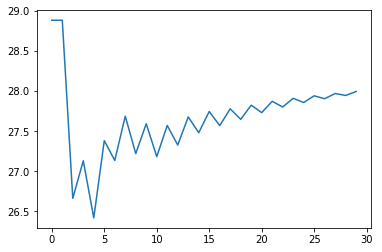

In [56]:
plt.plot(June1[6:36])